# Pitch control

## Importing libraries

In [1]:
from mplsoccer import Sbopen, VerticalPitch
import numpy as np
import matplotlib.pyplot as plt

## Making Voronoi diagrams

### Opening data

In [2]:
# Declaring parser
parser = Sbopen()

# Opening event dataset
df_event = parser.event(3835331)[0]

# Finding Bennison goal
event = df_event.loc[df_event["outcome_name"] == 'Goal'].loc[df_event["player_name"] == 'Hanna Ulrika Bennison']

# Saving its id
event_id = event["id"].iloc[0]

# Opening 360 data
df_frame, df_visible = parser.frame(3835331)

# Getting visible area
visible_area = np.array(df_visible.loc[df_visible["id"] == event_id]['visible_area'].iloc[0]).reshape(-1, 2)

### Plotting visible area

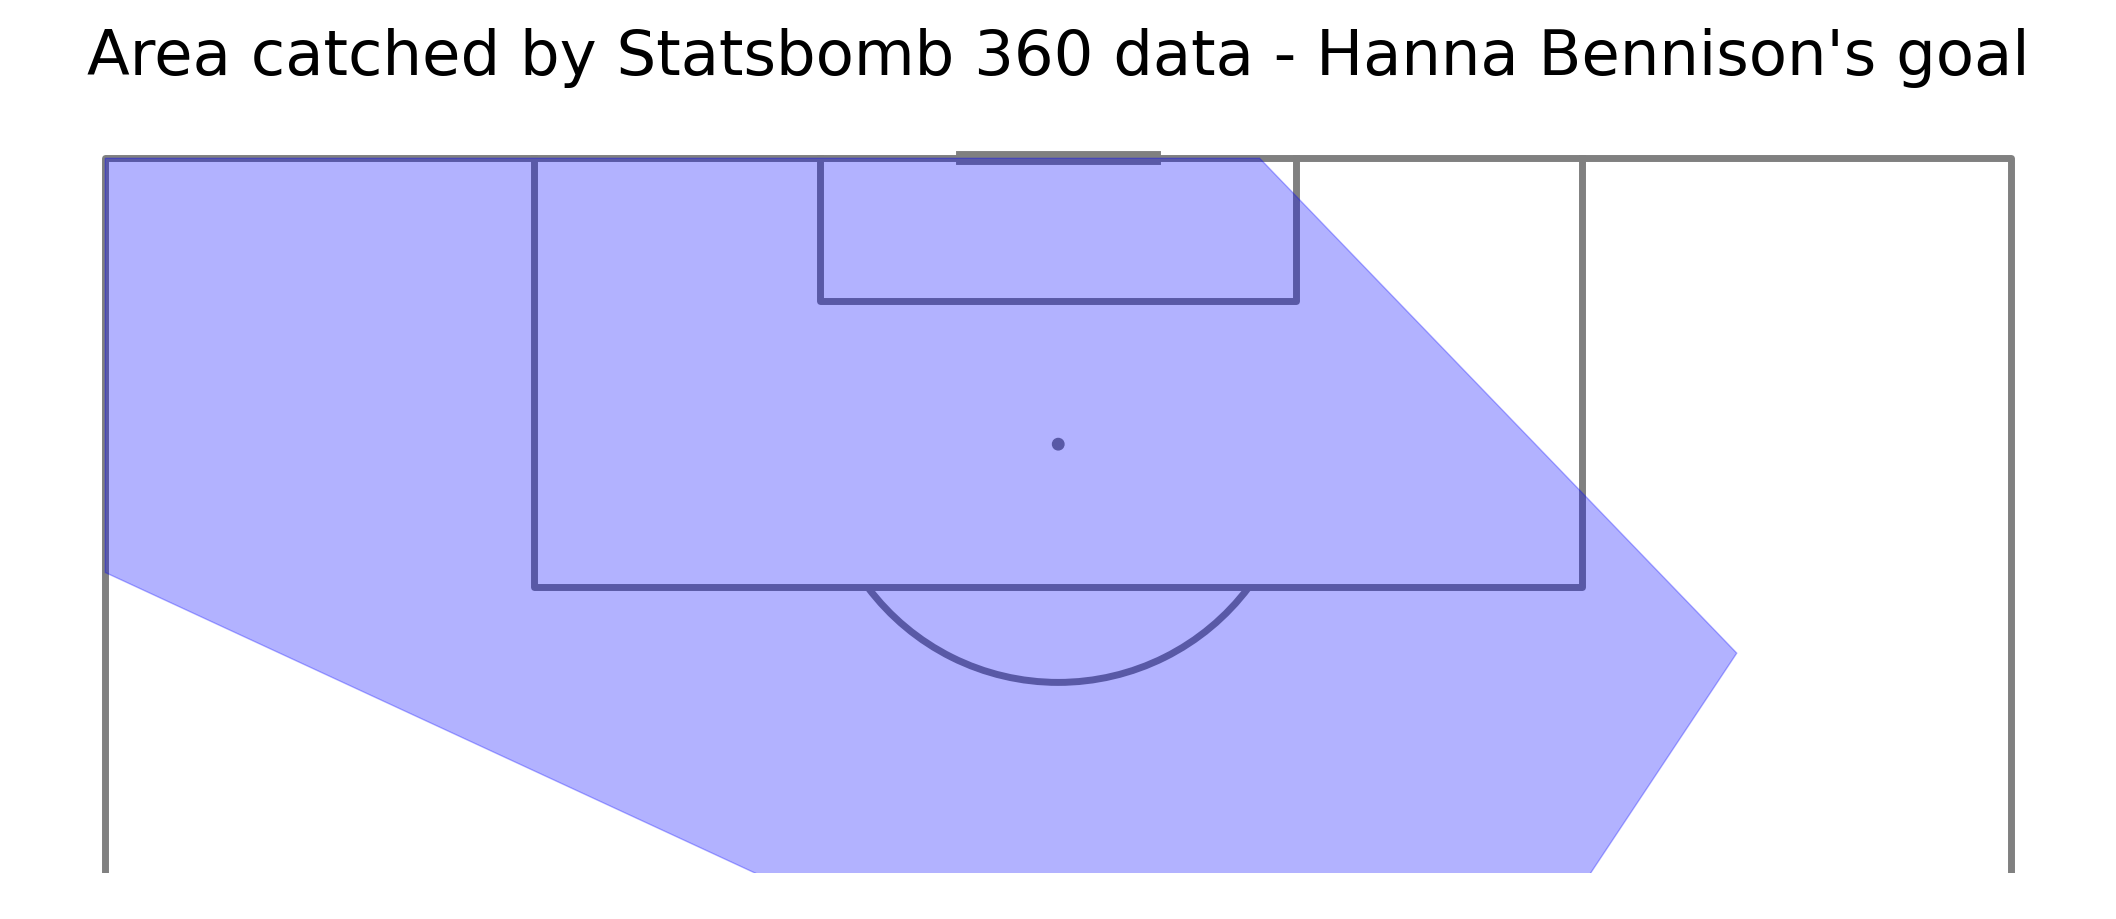

In [3]:
pitch  = VerticalPitch(line_color='grey', line_zorder = 1, half = True, pad_bottom=-30, linewidth=5)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Adding visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
fig.suptitle("Area catched by Statsbomb 360 data - Hanna Bennison's goal", fontsize = 45)
plt.show()

### Plotting player position

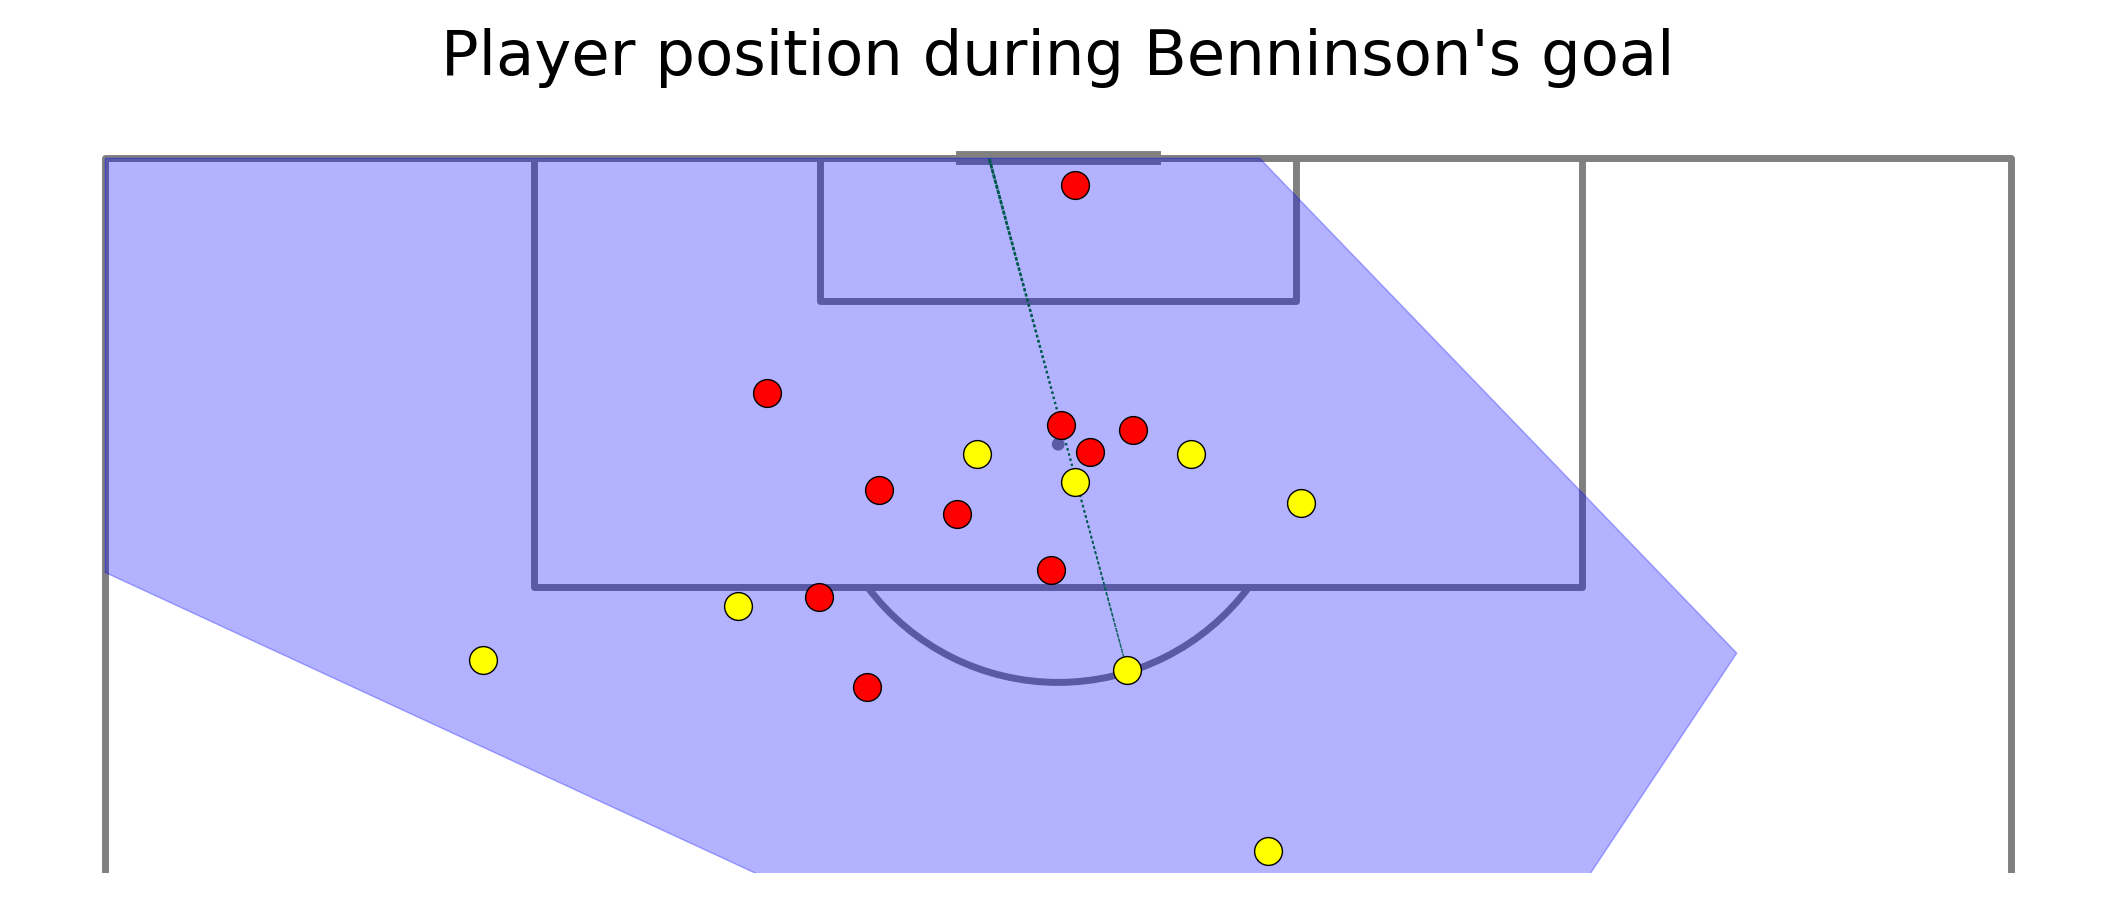

In [4]:
# Getting player position for this event
player_position = df_frame.loc[df_frame["id"] == event_id]

# Getting swedish player position
sweden = player_position.loc[player_position["teammate"] == True]

# Getting swiss player positions
swiss = player_position.loc[player_position["teammate"] == False]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plotting visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)

# Plotting sweden players - yellow
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)

# Plotting swiss players - red
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)

# Adding shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 2)
fig.suptitle("Player position during Benninson's goal", fontsize = 45)
plt.show()


### Plotting Voronoi diagram for one team

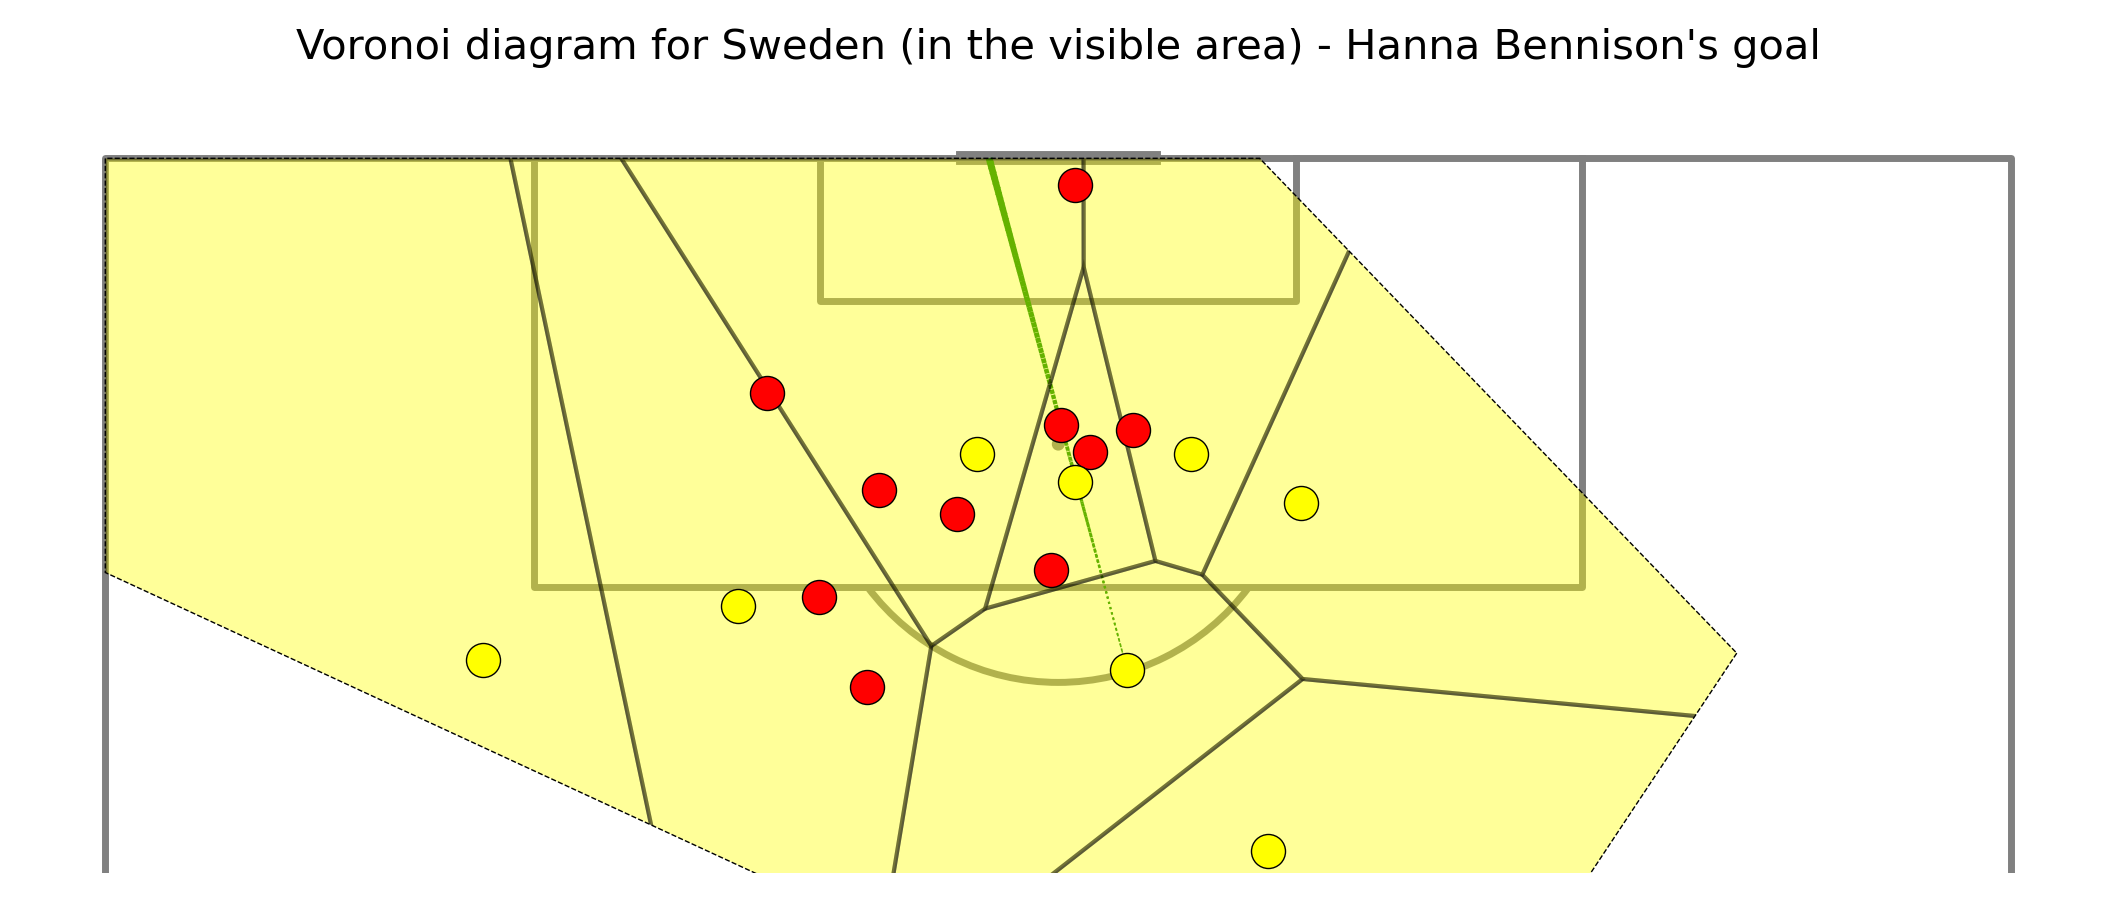

In [5]:
# Calculating Voronoi for Sweden
team1, team2 = pitch.voronoi(sweden.x, sweden.y,
                         sweden.teammate)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plotting voronoi diagrams as polygons
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)

# Marking visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)

# Plotting swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)

# Plotting swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)

# Plotting shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# Limiting Voronoi diagram to visible area
for p1 in t1:
    p1.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Sweden (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()

### Plotting Voronoi diagrams for 2 teams

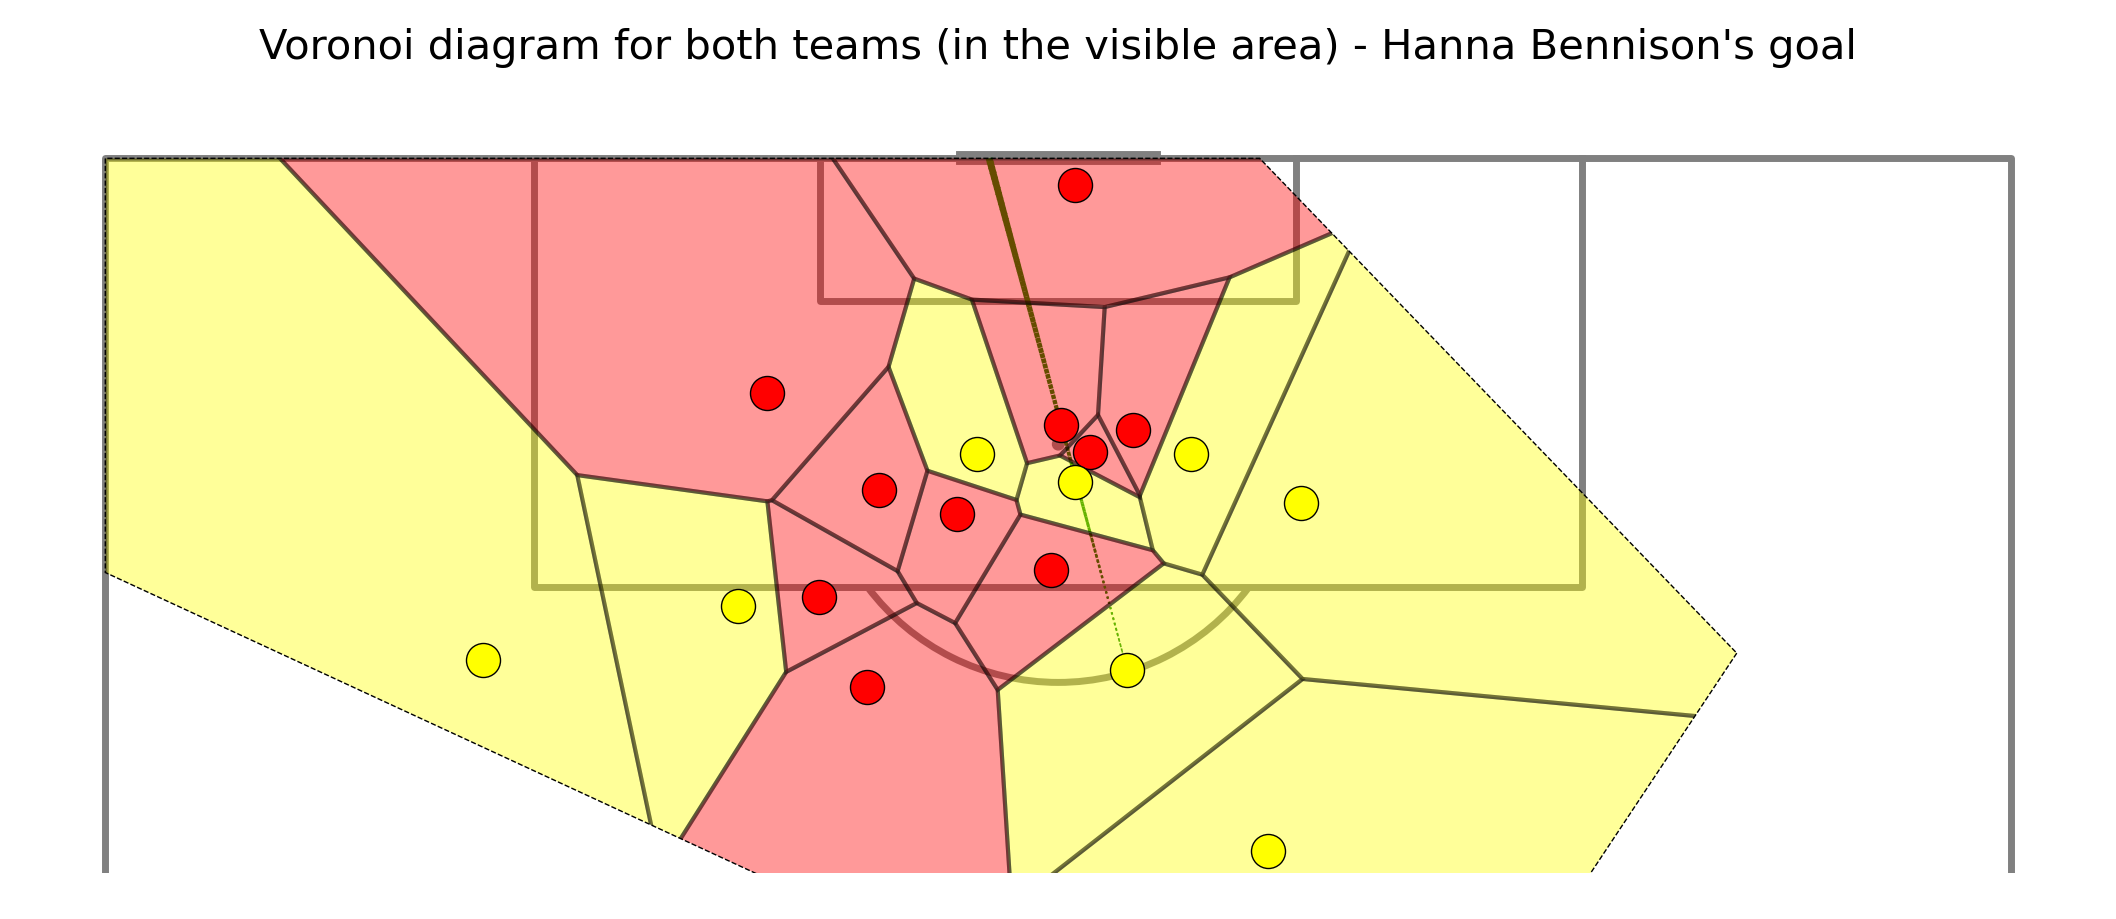

In [6]:
# Calculating Voronoi for both teams
team1, team2 = pitch.voronoi(player_position.x, player_position.y,
                         player_position.teammate)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Adding sweden
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)

# Adding switzerland
t2 = pitch.polygon(team2, ax = ax["pitch"], color = 'red', ec = 'black', lw=3, alpha=0.4, zorder = 2)

# Marking visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)

# Plotting swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)

# Plotting swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)

# Plotting shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)
# Clipping sweden
for p1 in t1:
    p1.set_clip_path(visible[0])
    
# Clipping switzerland
for p2 in t2:
    p2.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for both teams (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()